In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data= pd.read_excel("default of credit card clients.xls",header=1)

In [3]:
data_prop = data.drop(['ID'],axis=1)

In [4]:
df = pd.DataFrame(data_prop)

# Feature engineering : 

In [5]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
fil = (df.MARRIAGE == 0) 
df.loc[fil, 'MARRIAGE'] = 3
fil = (df.PAY_0 == 0) | (df.PAY_0 == -2)
df.loc[fil,'PAY_0'] = -1
fil = (df.PAY_2 == 0) | (df.PAY_2 == -2)
df.loc[fil,'PAY_2'] = -1
fil= (df.PAY_3 == 0) | (df.PAY_3 == -2)
df.loc[fil,'PAY_3'] = -1
fil = (df.PAY_4 == 0) | (df.PAY_4 == -2)
df.loc[fil,'PAY_4'] = -1
fil= (df.PAY_5 == 0) | (df.PAY_5 == -2)
df.loc[fil,'PAY_5'] = -1
fil = (df.PAY_6 == 0) | (df.PAY_6 == -2)
df.loc[fil,'PAY_6'] = -1

- data pour cercle de corrélation 

In [6]:
df1=pd.DataFrame(df)
Y_targetc = df1.iloc[:, -1]
Z = df1.iloc[:, 0:23]

- data pour acp

In [7]:
df2=pd.DataFrame(df)
Xa = df2.iloc[:, 0:23].values
y_targeta = df2.iloc[:, -1].values

# FEATURE SELECTION :

- Coef de corrélation Pearson

In [8]:
# find correlations to target
corr_matrix = df.corr(method='pearson').abs()
print(corr_matrix['default payment next month'].sort_values(ascending=False).head(23))

default payment next month    1.000000
PAY_0                         0.398636
PAY_2                         0.333438
PAY_3                         0.292026
PAY_4                         0.274779
PAY_5                         0.266465
PAY_6                         0.248252
LIMIT_BAL                     0.153520
PAY_AMT1                      0.072929
PAY_AMT2                      0.058579
PAY_AMT4                      0.056827
PAY_AMT3                      0.056250
PAY_AMT5                      0.055124
PAY_AMT6                      0.053183
SEX                           0.039961
EDUCATION                     0.033842
MARRIAGE                      0.027575
BILL_AMT1                     0.019644
BILL_AMT2                     0.014193
BILL_AMT3                     0.014076
AGE                           0.013890
BILL_AMT4                     0.010156
BILL_AMT5                     0.006760
Name: default payment next month, dtype: float64


In [9]:
# heatmap
matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(matrix)
plt.show;


In [10]:
# Find index of feature columns with high correlation
to_drop = [column for column in matrix.columns if any(matrix[column] > 0.90)]
print('Columns to drop: ' , (len(to_drop)))

Columns to drop:  5


In [11]:
df=df.drop(data[to_drop], axis=1)

- separation de données 

In [12]:
X = df.iloc[:, 0:-1].values
y_target = df.iloc[:, -1].values

- split data into train and test 

In [13]:
from sklearn.preprocessing import StandardScaler

# Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2,random_state=0)

- KNN AFTER FS

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [15]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
predictions_knn = [round(value) for value in y_pred_knn]
# evaluate predictions
accuracyknn = accuracy_score(y_test, predictions_knn)
print("Accuracy: %.2f%%" % (accuracyknn * 100.0))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.79
Accuracy: 79.30%


In [16]:
# Accuracy: 79.03%  presque rien a changé 

- RF AFTER FS 

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)


# make predictions
y_pred_rfc = rfc_model.predict(X_test)
predictions_rfc = [round(value) for value in y_pred_rfc]   

In [18]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))
# evaluate predictions
accuracyrfc = accuracy_score(y_test, predictions_rfc)
print("Accuracy: %.2f%%" % (accuracyrfc * 100.0))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.82
Accuracy: 82.30%


In [19]:
#Accuracy: 82.33% c est la meme

- SVM AFTER FS 

In [20]:
from sklearn.svm import SVC

In [21]:
# Create support vector classifier
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# Train classifier
modelsvc = svc.fit(X, y_target)


# make predictions
y_pred_svc = modelsvc.predict(X_test)
predictions_svc = [round(value) for value in y_pred_svc]   

In [22]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(modelsvc.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(modelsvc.score(X_test, y_test)))
# evaluate predictions
accuracysvc = accuracy_score(y_test, predictions_svc)
print("Accuracy: %.2f%%" % (accuracysvc * 100.0))

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.78
Accuracy: 78.30%


In [23]:
# RIEN A changé

- PCA

In [54]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(Xa)

In [55]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [56]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 23
Reduced number of features: 19


In [57]:
DF = pd.DataFrame(X_pca)

- KNN AFTER PCA 

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(DF, y_targeta, test_size=0.2, random_state=0)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn_model = knn.fit(X_train2, y_train2)
y_pred_knn =knn_model.predict(X_test2)

In [70]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train2, y_train2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test2, y_test2)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.79


In [61]:
# rien a changé 

- RF after pca

In [71]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(DF, y_targeta,test_size=0.2, random_state=0)

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_trainr, y_trainr)
y_pred_rfc = rfc_model.predict(X_testr)

C:\Users\Anja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_trainr, y_trainr)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_testr, y_testr)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.80


In [74]:
# Accuracy: 82.33% l acc a ete diminue 

## Cercle de correlation 

In [40]:
# Importons les libraries
from sklearn import preprocessing, decomposition
# Pour les représentations graphiques, nous allons utiliser cette fonction
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="red")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            #plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)



In [41]:
data_acp =Z.select_dtypes(include = np.number)
# Mettons à l'échelle ces données
data_scaled = pd.DataFrame(preprocessing.scale(data_acp), columns = data_acp.columns, index = data_acp.index)

In [42]:
ACP = decomposition.PCA(n_components= 2)

In [43]:
ACP.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

- les dimensions 

In [44]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

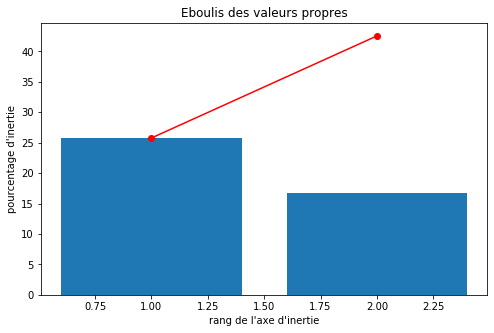

In [45]:
plt.figure(figsize = (8,5))
display_scree_plot(ACP)

- Cercle de corrélation  et graphe des individus : 

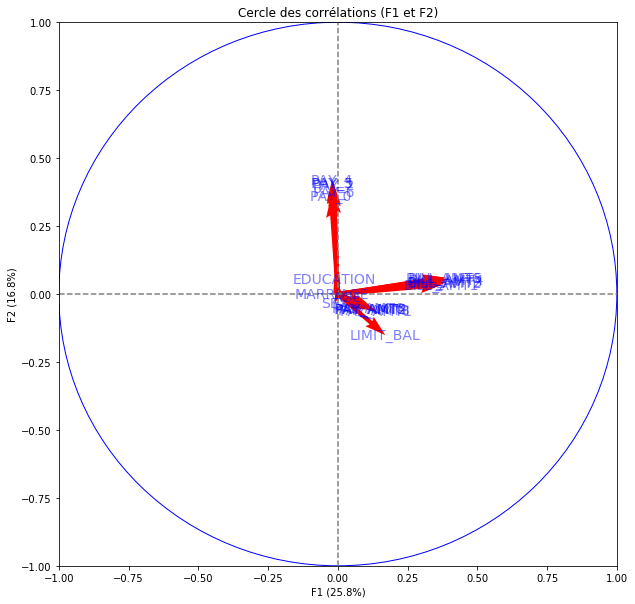

In [46]:
composantes = ACP.components_
nbre_composantes = ACP.n_components
display_circles(composantes, nbre_composantes, ACP, axis_ranks= [(0,1)], labels= np.array(data_acp.columns))

# Projection des individus
X_projected = ACP.transform(data_scaled)
display_factorial_planes(X_projected, nbre_composantes,ACP, [(0,1)])

Text(0, 0.5, 'Composant 2 : 16.77 ')

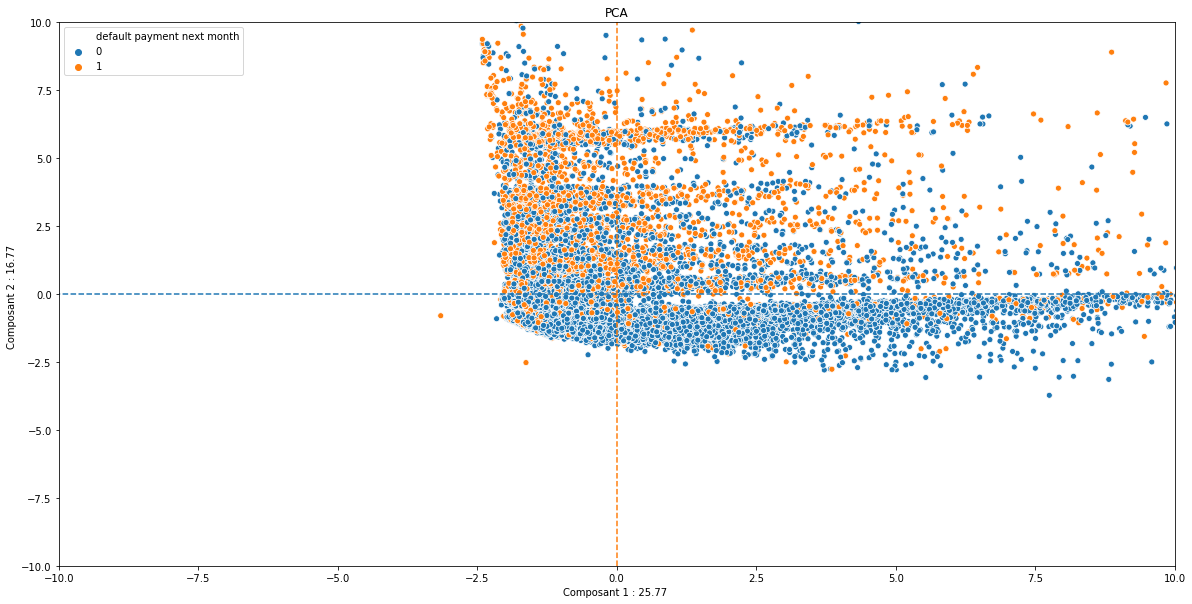

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(X_projected[:,0],X_projected[:,1],hue=Y_targetc)

plt.plot([-15,15],[0,0],ls="--")
plt.plot([0,0],[-10,10],ls="--")
plt.title("PCA")
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel("Composant 1 : %s "%round(100*ACP.explained_variance_ratio_[0],2))
plt.ylabel("Composant 2 : %s "%round(100*ACP.explained_variance_ratio_[1],2))

# PICKLE ACP 

In [92]:
import pickle

algo=[X_projected ,Y_targetc,composantes,Z.columns ]
# Saving model to disk
pickle.dump(algo, open('pcataywan.pkl','wb'))

In [93]:
model = pickle.load(open('acp.pckl','rb'))
for i in range(len(model)):
    print(model[i])

[[-2.2983     -0.14005489]
 [-1.17832819  0.3311582 ]
 [-2.53678203 -0.07470743]
 ...
 [ 1.42156476 -1.44084669]
 [ 1.3858396  -1.4473458 ]
 [ 1.36653112 -1.48902503]]
0       1
1       1
2       1
4       0
5       1
6       1
7       1
8       1
9       1
11      1
12      1
13      0
14      1
15      1
16      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      0
27      1
28      1
29      0
30      0
31      1
32      1
       ..
5930    1
5931    1
5932    1
5933    1
5934    1
5935    0
5936    0
5937    0
5938    0
5939    0
5940    0
5941    0
5942    0
5943    0
5944    0
5945    0
5946    0
5947    0
5948    0
5949    0
5950    0
5951    0
5952    0
5953    0
5954    0
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5723, dtype: int64
[[ 0.29150075  0.5897702   0.5937377   0.05405035 -0.03668411  0.04770116
   0.21482307  0.04452753  0.35804487  0.1783357 ]
 [-0.06834075 -0.00755636 -0.07251847 -0.26029304  0.521575